In [16]:
from caik import cai
import skrf as rf
from caik import matrixDecoder as md

In [17]:
%matplotlib inline
rf.stylely()
rf.stylely()
key = cai.CAI(start = True, resolution = 20, dimension = 4)
key.esp.current_axis = 2

# Test Calibration

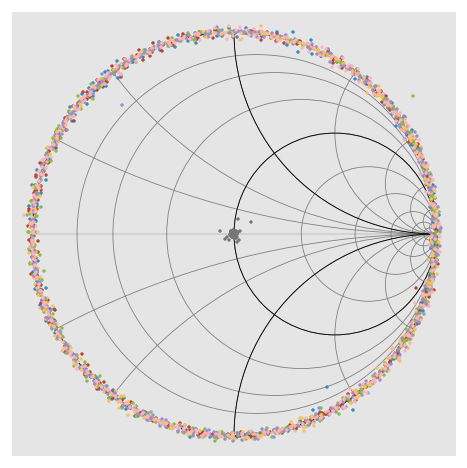

In [18]:
test_cal_1 = key.take_simple_cal()

In [129]:
test_cal_1.write('no_light_absorber')

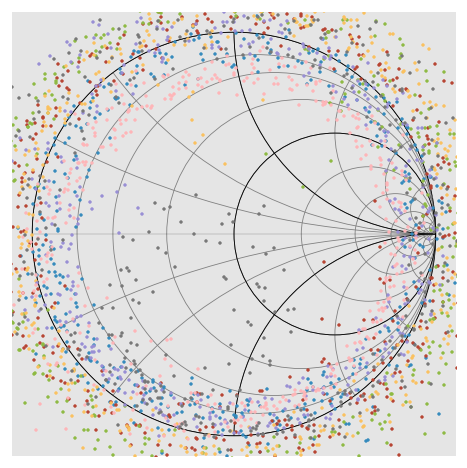

In [35]:
test_cal = key.take_simple_cal()

In [4]:
test_cal

OnePort Calibration: '', 500-750 GHz, 401 pts, 7-standards

In [131]:
test_cal.write('full_light_dark_match')

In [57]:
key.zva.write_data('test')

In [132]:
test = rf.Network('test.s1p')
test_caled = test_cal.apply_cal(test)
test_caled.name = test.name + ' corrected'

In [44]:
key.zva.write_data('square_1')

In [133]:
sq_1 = rf.Network('square_1.s1p')
sq_1_caled = test_cal.apply_cal(sq_1)
sq_1_caled.name = sq_1.name + ' corrected'

In [52]:
key.zva.write_data('square_2')

In [134]:
sq_2 = rf.Network('square_2.s1p')
sq_2_caled = test_cal.apply_cal(sq_2)
sq_2_caled.name = sq_2.name + ' corrected'

In [86]:
key.zva.write_data('square_3')

In [135]:
sq_3 = rf.Network('square_3.s1p')
sq_3_caled = test_cal.apply_cal(sq_3)
sq_3_caled.name = sq_3.name + ' corrected'

In [91]:
key.zva.write_data('square_4')

In [136]:
sq_4 = rf.Network('square_4.s1p')
sq_4_caled = test_cal.apply_cal(sq_4)
sq_4_caled.name = sq_4.name + ' corrected'

In [96]:
key.zva.write_data('square_5')

In [137]:
sq_5 = rf.Network('square_5.s1p')
sq_5_caled = test_cal.apply_cal(sq_5)
sq_5_caled.name = sq_5.name + ' corrected'

In [99]:
key.zva.write_data('square_6')

In [138]:
sq_6 = rf.Network('square_6.s1p')
sq_6_caled = test_cal.apply_cal(sq_6)
sq_6_caled.name = sq_6.name + ' corrected'

In [103]:
key.zva.write_data('square_7')

In [139]:
sq_7 = rf.Network('square_7.s1p')
sq_7_caled = test_cal.apply_cal(sq_7)
sq_7_caled.name = sq_7.name + ' corrected'

In [108]:
key.zva.write_data('square_8')

In [140]:
sq_8 = rf.Network('square_8.s1p')
sq_8_caled = test_cal.apply_cal(sq_8)
sq_8_caled.name = sq_8.name + ' corrected'

In [77]:
key.zva.write_data('black')

In [141]:
black = rf.Network('black.s1p')
black_caled = test_cal.apply_cal(black)
black_caled.name = black.name + ' corrected'

In [112]:
key.zva.write_data('no_sq')

In [142]:
no_sq = rf.Network('no_sq.s1p')
no_sq_caled = test_cal.apply_cal(no_sq)
no_sq_caled.name = no_sq.name + ' corrected'

In [1]:
#test.plot_s_db(color = 'r', title = 'Test with Si')
#test_caled.plot_s_db(color = 'b')
sq_1_caled.plot_s_db(color = 'c')
#sq_2_caled.plot_s_db(color = 'b')
#sq_3_caled.plot_s_db(color = 'y')
#sq_4_caled.plot_s_db(color = 'r')
#sq_5_caled.plot_s_db(color = 'c')
#sq_6_caled.plot_s_db(color = 'm')
#sq_7_caled.plot_s_db(color = 'g')
sq_8_caled.plot_s_db(color = 'y')
#no_sq_caled.plot_s_db(color = 'r')
#black_caled.plot_s_db(color = 'k')

NameError: name 'sq_1_caled' is not defined

# ITO Cal (600 - 650 GHz)

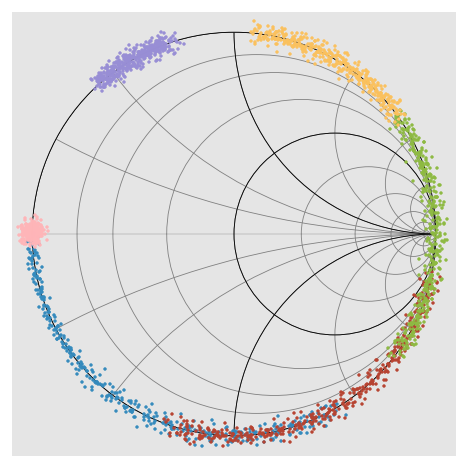

In [12]:
cal = key.take_simple_cal()
rf.stylely()

In [33]:
cal.write('ito_cal')

In [31]:
pwd

u'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging'

In [13]:
key.zva.write_data('ntwk')

In [14]:
ntwk = rf.Network('ntwk.s1p')
ntwk_caled = cal.apply_cal(ntwk)
ntwk_caled.name = ntwk.name + ' corrected'

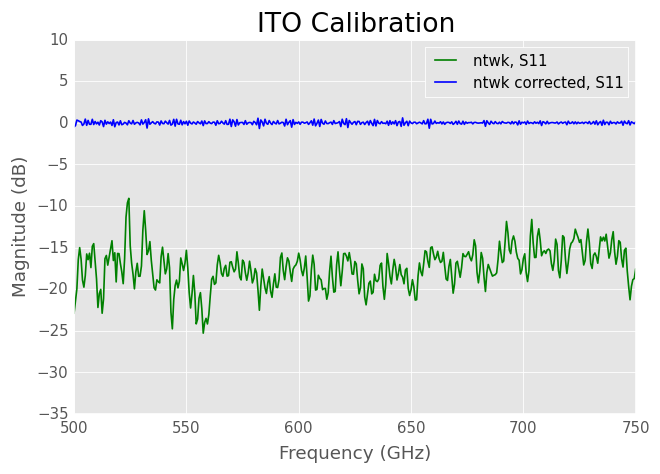

In [15]:
ntwk.plot_s_db(color = 'g', title = 'ITO Calibration')
ntwk_caled.plot_s_db(color = 'b')
rf.stylely()

# Off, Dark, Flood

#### Off

In [21]:
key.zva.write_data('off')

In [22]:
off = rf.Network('off.s1p')
off_caled = cal.apply_cal(off)
off_caled.name = off.name = ' corrected'

#### Dark

In [23]:
key.zva.write_data('dark')

In [24]:
dark = rf.Network('dark.s1p')
dark_caled = cal.apply_cal(dark)
dark_caled.name = dark.name + ' corrected'

#### Flood

In [25]:
key.zva.write_data('flood')

In [26]:
flood = rf.Network('flood.s1p')
flood_caled = cal.apply_cal(flood)
flood_caled.name = flood.name + ' corrected'

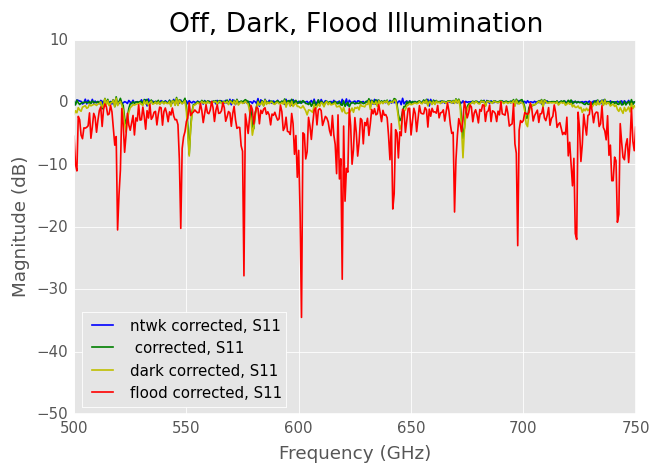

In [29]:
ntwk_caled.plot_s_db(color = 'b', title = 'Off, Dark, Flood Illumination')
off_caled.plot_s_db(color = 'g')
dark_caled.plot_s_db(color = 'y')
flood_caled.plot_s_db(color = 'r')

# Imaging

In [29]:
key.take_image()

In [30]:
key.matrixList

['111-111-111----1111-111-111----1111-111-111----1---1---1---1111-',
 '---1---1---1111-111-111-111----1111-111-111----1111-111-111----1',
 '111-111-111----1111-111-111----1---1---1---1111-111-111-111----1',
 '111-111-111----1---1---1---1111-111-111-111----1111-111-111----1',
 '---1111-111-111----1111-111-111----1111-111-111-111----1---1---1',
 '111----1---1---1---1111-111-111----1111-111-111----1111-111-111-',
 '---1111-111-111----1111-111-111-111----1---1---1---1111-111-111-',
 '---1111-111-111-111----1---1---1---1111-111-111----1111-111-111-',
 '111-111----1111-111-111----1111-111-111----1111----1---1111----1',
 '---1---1111----1111-111----1111-111-111----1111-111-111----1111-',
 '111-111----1111-111-111----1111----1---1111----1111-111----1111-',
 '111-111----1111----1---1111----1111-111----1111-111-111----1111-',
 '111----1111-111-111----1111-111-111----1111-111----1111----1---1',
 '---1111----1---1111----1111-111-111----1111-111-111----1111-111-',
 '111----1111-111-111----1111-111-

In [4]:
new = cai.recursion_fix(3, key.matrixList)

In [3]:
print new

NameError: name 'new' is not defined

In [7]:
f = open("matrices_1.txt", "w")
for i in range(0,  len(new)):
    string = ""
    for x in range(0, len(new)):
        if new[i][x] == '-':
            string += '0'
        else:
            string += '1'
    f.write(string + '\n')
f.close

<function close>

In [5]:
print string

1111111110101010110011001001100111110000101001011100001110010110


In [5]:
f = open("matrices_0.txt", "w")
for matrix in new:
    f.write(matrix + '\n')
f.close

<function close>

In [6]:
new[0]

'111111111-1-1-1-11--11--1--11--11111----1-1--1-111----111--1-11-'

In [8]:
md.get_re(600, 'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj\\0')

0.0719003908452

In [5]:
import os

In [17]:
os.chdir('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj')
for x in range(0, 64):
    os.chdir(str(x))
    obj = rf.Network('object.s1p')
    obj_caled = cal.apply_cal(obj)
    obj_caled.name = obj.name + ' corrected'
    obj_caled.write_touchstone(form = 'ma')
    os.chdir('..')

In [4]:
min_list = []
os.chdir('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj')
for x in range(0, 64):
    os.chdir(str(x))
    mag_list = []
    f = open('object corrected.s1p', 'r')
    f.readline()
    f.readline()
    f.readline()
    for line in f:
        sep = line.split(' ')
        mag = float(sep[1])
        mag_list.append(mag)
    min_list.append(min(mag_list))
    os.chdir('..')

In [5]:
print min_list

[0.00646061270367, 0.0640223445992, 0.0239205278663, 0.0558177895185, 0.0605804002827, 0.08459859917, 0.0315104979011, 0.0617028842271, 0.0501157758873, 0.0350997849986, 0.0179731344586, 0.00420109906238, 0.0386117734411, 0.0807806792633, 0.0359572154249, 0.0477459206302, 0.054455517765, 0.0624452974663, 0.0200007544083, 0.0454214570191, 0.0623616426979, 0.0973065097749, 0.064636228556, 0.0530284752403, 0.0298154147595, 0.0714350654593, 0.0604884809889, 0.00968873042678, 0.0606224123314, 0.0385814899065, 0.0124808752912, 0.0469564665861, 0.0864425613558, 0.0599106390738, 0.0240833040738, 0.0611377463522, 0.0571162041655, 0.0827453165645, 0.0323322151735, 0.0256015189483, 0.0548656062506, 0.0352264412772, 0.080794324272, 0.0377262179317, 0.0665980802094, 0.0629984619579, 0.0193332118977, 0.054856697598, 0.0166986660287, 0.0699812709247, 0.00903777900325, 0.00378161328635, 0.0666497919909, 0.0535688612, 0.0455034648217, 0.0435007033664, 0.0596341389792, 0.0720343680435, 0.0369370184249, 

In [6]:
import numpy as np

In [7]:
m = []
for value in min_list:
    temp = []
    temp.append(value)
    m.append(temp)
measured = np.asarray(m)

In [8]:
print measured

[[ 0.00646061]
 [ 0.06402234]
 [ 0.02392053]
 [ 0.05581779]
 [ 0.0605804 ]
 [ 0.0845986 ]
 [ 0.0315105 ]
 [ 0.06170288]
 [ 0.05011578]
 [ 0.03509978]
 [ 0.01797313]
 [ 0.0042011 ]
 [ 0.03861177]
 [ 0.08078068]
 [ 0.03595722]
 [ 0.04774592]
 [ 0.05445552]
 [ 0.0624453 ]
 [ 0.02000075]
 [ 0.04542146]
 [ 0.06236164]
 [ 0.09730651]
 [ 0.06463623]
 [ 0.05302848]
 [ 0.02981541]
 [ 0.07143507]
 [ 0.06048848]
 [ 0.00968873]
 [ 0.06062241]
 [ 0.03858149]
 [ 0.01248088]
 [ 0.04695647]
 [ 0.08644256]
 [ 0.05991064]
 [ 0.0240833 ]
 [ 0.06113775]
 [ 0.0571162 ]
 [ 0.08274532]
 [ 0.03233222]
 [ 0.02560152]
 [ 0.05486561]
 [ 0.03522644]
 [ 0.08079432]
 [ 0.03772622]
 [ 0.06659808]
 [ 0.06299846]
 [ 0.01933321]
 [ 0.0548567 ]
 [ 0.01669867]
 [ 0.06998127]
 [ 0.00903778]
 [ 0.00378161]
 [ 0.06664979]
 [ 0.05356886]
 [ 0.04550346]
 [ 0.0435007 ]
 [ 0.05963414]
 [ 0.07203437]
 [ 0.03693702]
 [ 0.01358914]
 [ 0.06007103]
 [ 0.03363391]
 [ 0.04157614]
 [ 0.03157091]]


In [33]:
os.chdir('..')

In [34]:
pwd

u'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging'

In [55]:
m = []
f = open("matrices_0.txt", "r")
for line in f:
    temp = []
    for x in range(0, 64):
        character = line[x]
        if character == '1':
            temp.append(-1.0)
        else:
            temp.append(1.0)
    m.append(temp)
arrays = np.asarray(m)

In [12]:
print len(arrays[63])

64


In [17]:
print arrays[63]

[-1.  1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1.
 -1.  1.  1. -1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.
 -1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1.
 -1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [14]:
print arrays

[[-1. -1. -1. ..., -1. -1.  1.]
 [ 1.  1.  1. ...,  1.  1. -1.]
 [-1. -1. -1. ...,  1.  1. -1.]
 ..., 
 [ 1. -1. -1. ..., -1. -1. -1.]
 [-1.  1.  1. ..., -1. -1. -1.]
 [-1.  1.  1. ..., -1. -1. -1.]]


In [15]:
from numpy.linalg import inv
m1 = np.matrix(measured)
m2 = inv(np.matrix(arrays))
calc = np.dot(m2, m1)

In [48]:
from matplotlib import pyplot as plt
import skrf as rf
rf.stylely()
%matplotlib inline
image = np.reshape(calc, (8, 8))
plt.imshow(image, vmin = np.amin(calc), vmax = np.amax(calc), interpolation = 'nearest')

NameError: name 'calc' is not defined

In [23]:
calc

matrix([[-0.0037112 ],
        [-0.00651078],
        [-0.00319356],
        [-0.00591443],
        [-0.00643107],
        [-0.003573  ],
        [-0.00555188],
        [-0.00819607],
        [ 0.00287159],
        [-0.00536878],
        [ 0.00046883],
        [-0.00319993],
        [-0.00477617],
        [-0.00664333],
        [-0.00727375],
        [-0.01196193],
        [-0.00170954],
        [-0.00389681],
        [-0.00636217],
        [-0.00183295],
        [-0.00572515],
        [-0.00611836],
        [-0.00843682],
        [-0.00867315],
        [-0.00512784],
        [-0.00475195],
        [-0.00632537],
        [-0.00666155],
        [-0.00443234],
        [-0.00613908],
        [-0.00943831],
        [-0.00886126],
        [-0.00576392],
        [-0.00648777],
        [-0.00677443],
        [-0.00623983],
        [-0.00511744],
        [-0.00418558],
        [-0.00256532],
        [-0.00700846],
        [-0.003138  ],
        [-0.00728761],
        [-0.00704665],
        [-0

In [24]:
image

matrix([[-0.0037112 , -0.00651078, -0.00319356, -0.00591443, -0.00643107,
         -0.003573  , -0.00555188, -0.00819607],
        [ 0.00287159, -0.00536878,  0.00046883, -0.00319993, -0.00477617,
         -0.00664333, -0.00727375, -0.01196193],
        [-0.00170954, -0.00389681, -0.00636217, -0.00183295, -0.00572515,
         -0.00611836, -0.00843682, -0.00867315],
        [-0.00512784, -0.00475195, -0.00632537, -0.00666155, -0.00443234,
         -0.00613908, -0.00943831, -0.00886126],
        [-0.00576392, -0.00648777, -0.00677443, -0.00623983, -0.00511744,
         -0.00418558, -0.00256532, -0.00700846],
        [-0.003138  , -0.00728761, -0.00704665, -0.00643503, -0.00278612,
         -0.00252047, -0.00662404, -0.0077092 ],
        [-0.00896144, -0.01516743, -0.00744416, -0.00622718, -0.00720928,
         -0.00801592, -0.00309959, -0.00650376],
        [-0.00705444, -0.01009023, -0.00831922, -0.00476458, -0.00838616,
         -0.00028352, -0.00416351, -0.00670675]])

In [1]:
from caik import matrixDecoder as md

In [2]:
md.get_re(635, 'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj\\0')

0.945428827306

In [7]:
pwd

u'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj'

In [6]:
os.chdir('..')

In [56]:
import numpy as np
m = []
for x in range(0, 64):
    value = md.get_re(620, 'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\obj\\' + str(x))
    temp = []
    temp.append(value)
    m.append(temp)
measured_1 = np.asarray(m)

In [26]:
measured_1

array([[ 0.59462761],
       [ 0.44051379],
       [ 0.43264702],
       [ 0.57526027],
       [ 0.59961946],
       [ 0.73553974],
       [ 0.27564027],
       [ 0.2662562 ],
       [ 0.30605244],
       [ 0.5865111 ],
       [ 0.32571151],
       [ 0.55816036],
       [ 0.39855294],
       [ 0.63871387],
       [ 0.35889901],
       [ 0.27428368],
       [ 0.44409052],
       [ 0.64965786],
       [ 0.41865848],
       [ 0.68306647],
       [ 0.47517437],
       [ 0.34722506],
       [ 0.48992184],
       [ 0.438748  ],
       [ 0.38143195],
       [ 0.2391762 ],
       [ 0.39191105],
       [ 0.59591166],
       [ 0.45146964],
       [ 0.4079997 ],
       [ 0.79784961],
       [ 0.44607685],
       [ 0.60506123],
       [ 0.62427185],
       [ 0.83841237],
       [ 0.48490973],
       [ 0.62124599],
       [ 0.59783905],
       [ 0.62435608],
       [ 0.45832034],
       [ 0.47472295],
       [ 0.34161197],
       [ 0.64402892],
       [ 0.78426014],
       [ 0.58420112],
       [ 0

In [57]:
from numpy.linalg import inv
m1 = np.matrix(measured_1)
m2 = inv(np.matrix(arrays))
calc_1 = np.dot(m2, m1)

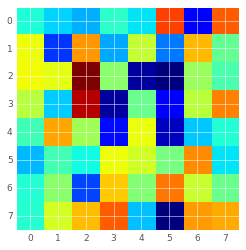

In [58]:
from matplotlib import pyplot as plt
import skrf as rf
rf.stylely()
%matplotlib inline
image = np.reshape(calc_1, (8, 8))
plt.imshow(image, vmin = np.amin(calc_1), vmax = np.amax(calc_1), interpolation = "nearest")

In [38]:
calc_1

matrix([[ 0.00438347],
        [-0.00375746],
        [-0.00927384],
        [ 0.00697473],
        [-0.00157053],
        [ 0.0722522 ],
        [-0.03747398],
        [ 0.06753967],
        [ 0.0417617 ],
        [-0.02714987],
        [ 0.05825736],
        [-0.01034071],
        [ 0.03424547],
        [-0.01742272],
        [ 0.05333395],
        [ 0.01671507],
        [ 0.04227334],
        [ 0.03994688],
        [ 0.09623807],
        [ 0.02364707],
        [-0.0495722 ],
        [-0.05392685],
        [ 0.02679632],
        [ 0.01209782],
        [ 0.0319194 ],
        [-0.00475721],
        [ 0.0888051 ],
        [-0.04985858],
        [ 0.01775022],
        [-0.03699153],
        [ 0.03236884],
        [ 0.06191691],
        [ 0.01005719],
        [ 0.0560817 ],
        [ 0.02773829],
        [-0.03357751],
        [ 0.04155549],
        [-0.04571584],
        [-0.00586491],
        [ 0.00524104],
        [-0.00803911],
        [ 0.01070765],
        [ 0.00203853],
        [ 0

In [9]:
import os

0

In [17]:
os.popen('tasklist').readlines()

['\n',
 'Image Name                     PID Session Name        Session#    Mem Usage\n',
 '========================= ======== ================ =========== ============\n',
 'System Idle Process              0 Services                   0          4 K\n',
 'System                           4 Services                   0     75,916 K\n',
 'smss.exe                       396 Services                   0        360 K\n',
 'csrss.exe                      692 Services                   0      2,184 K\n',
 'wininit.exe                    792 Services                   0        784 K\n',
 'csrss.exe                      800 Console                    1      6,064 K\n',
 'services.exe                   864 Services                   0      5,780 K\n',
 'lsass.exe                      872 Services                   0     12,644 K\n',
 'svchost.exe                    968 Services                   0     13,712 K\n',
 'svchost.exe                    100 Services                   0      9,140 K\n

In [20]:
os.system("taskkill /im microsoft.photos.exe /f")

0

In [1]:
import setuptools

In [20]:
import win32com.client

In [21]:
Application = win32com.client.Dispatch("PowerPoint.Application")

In [9]:
import sys

In [13]:
sys.argv

['C:\\Users\\Michael\\Anaconda\\lib\\site-packages\\ipykernel\\__main__.py',
 '-f',
 'C:\\Users\\Michael\\AppData\\Roaming\\jupyter\\runtime\\kernel-c9328792-159f-4468-8337-073d6cfc07a0.json']

In [22]:
Presentation = Application.Presentations.Open('C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Misc\\Hadamard Masks 5.pptx')

In [43]:
Presentation = Application.Presentations.Add()

In [44]:
Base = Presentation.Slides.Add(1, 12)

In [55]:
Next = Presentation.Slides.Add(1, 12)

In [22]:
oval = Base.Shapes.AddShape(9, 100, 100, 100, 100)

In [43]:
Pict1 = Base.Shapes.AddPicture(FileName = 'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\mask.png', LinkToFile = False, SaveWithDocument = True, Left = 200, Top = 0, Width = -1, Height = -1)

In [29]:
background = Presentation.Slides[0].ColorScheme.Colors(1).RGB = 0

In [100]:
save = os.getcwd() + '\\test.pptx'
print save
Presentation.SaveAs(os.getcwd() + '\\test.pptx')

C:\Users\Michael\Documents\GitHub\THzCAI\Research\Imaging Worksheets\Imaging\test.pptx


In [87]:
os.getcwd() + '\\test.pptx'

'C:\\Users\\Michael\\Documents\\GitHub\\THzCAI\\Research\\Imaging Worksheets\\Imaging\\test.pptx'

In [80]:
import os

In [81]:
os.path

<module 'ntpath' from 'C:\Users\Michael\Anaconda\lib\ntpath.pyc'>

In [17]:
dir

<function dir>

In [83]:
dir

<function dir>

In [23]:
Application.ActivePresentation.SlideShowSettings.Run()

<COMObject Run>

In [103]:
Application.SlideShowWindows[0].View.First()

AttributeError: <unknown>.Close

In [106]:
Application.SlideShowWindows[0].View.Exit()

In [29]:
Application.SlideShowWindows[0].View.GotoSlide(2049)

In [25]:
ls

 Volume in drive C is OS
 Volume Serial Number is 24E3-8874

 Directory of C:\Users\Michael\Documents\GitHub\THzCAI\Research\Imaging Worksheets\Imaging

01/18/2016  01:58 PM    <DIR>          .
01/18/2016  01:58 PM    <DIR>          ..
01/07/2016  04:32 PM    <DIR>          .ipynb_checkpoints
01/13/2016  04:51 PM            15,509 black.s1p
01/12/2016  04:17 PM            15,187 dark.s1p
01/12/2016  04:19 PM            15,383 flood.s1p
01/13/2016  05:30 PM           310,928 full_light_dark_match.cal
01/13/2016  03:12 PM           310,928 full_light_with_absorber.cal
01/13/2016  03:13 PM           310,928 full_light_with_match.cal
01/18/2016  01:58 PM           709,260 Imaging.ipynb
01/12/2016  05:11 PM           278,534 ito_cal.cal
01/07/2016  08:39 PM             4,224 matrices_0.txt
01/07/2016  08:39 PM             4,224 matrices_1.txt
01/13/2016  05:28 PM           310,928 no_light_absorber.cal
01/13/2016  05:29 PM           310,928 no_light_dark_match.cal
01/13/2016  03:16 PM      

In [15]:
import os
os.chdir('C:\\Users\\Michael\\Documents\\GitHub')
import Pywin32.setup
from win32com.client.gencache import EnsureDispatch

def run():
    for w in EnsureDispatch("Shell.Application").Windows():
        print(w.LocationName + '=' + w.LocationURL)

ImportError: No module named Pywin32.setup